Trần Quang Nghĩa

19110392

Lab 04 - Data Mining

# EDA 02

In [17]:
# import basic libraries 
import numpy as np 
import pandas as pd
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
# import plot libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

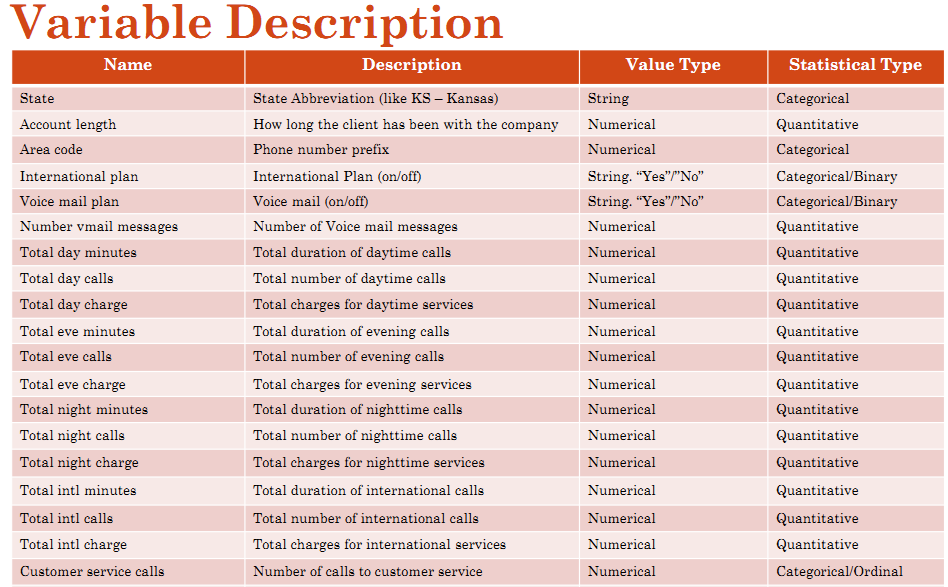

In [3]:
from IPython.display import Image
Image(filename = "CustomerChurn.png") 

In [4]:
# Read data
data = pd.read_csv("telecom_churn.csv")
data.head() 

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [6]:
print(" List of unique values in State : ")
print(data['State'].unique())
print(" List of unique values in International plan : ")
print(data['International plan'].unique())
print(" List of unique values in Voice mail plan : ")
print(data['Voice mail plan'].unique())

#Special Field
print(" List of unique values in Area code : ")
print(data['Area code'].unique())

 List of unique values in State : 
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
 List of unique values in International plan : 
['No' 'Yes']
 List of unique values in Voice mail plan : 
['Yes' 'No']
 List of unique values in Area code : 
[415 408 510]


In [7]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [18]:
def DrawJointPlot(DataFrame, XAtt, yAtt, bins = 20):
  sns.set(color_codes=True)
  sns.distplot(data[XAtt], bins=bins);

  df = pd.DataFrame(DataFrame, columns=[XAtt,yAtt])
  df = df.reset_index(drop=True)
  sns.jointplot(x=XAtt, y=yAtt, data=df);

In [19]:
dataNChurn = data[data['Churn'] == False]
dataNChurn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
dataNChurn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


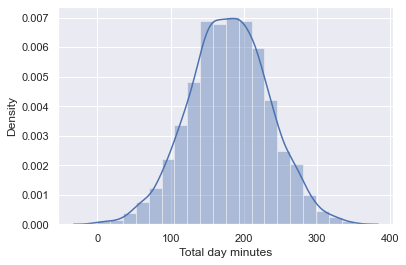

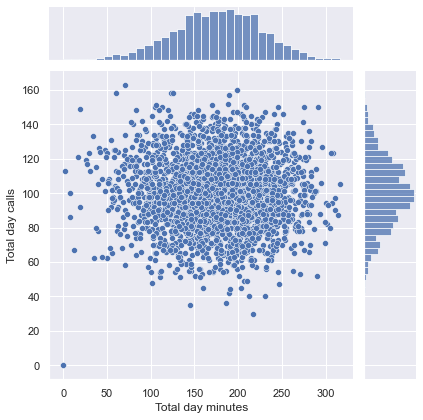

In [20]:
DrawJointPlot(dataNChurn, 'Total day minutes', 'Total day calls')

In [12]:
data.describe(include=['O'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [13]:
def DrawBarplot(DataFrame, att):
  Distribution = DataFrame[att].value_counts()
  Distribution = pd.DataFrame({att:Distribution.index, 'Freq':Distribution.values})
  Distribution = Distribution.sort_values(by=att, ascending=True)
  plt.subplots(figsize=(18,5))
  plt.bar(Distribution[att], Distribution["Freq"])
  plt.xticks(Distribution[att])
  plt.ylabel('Frequency')
  plt.title('Barplot of ' + att)
  plt.show()

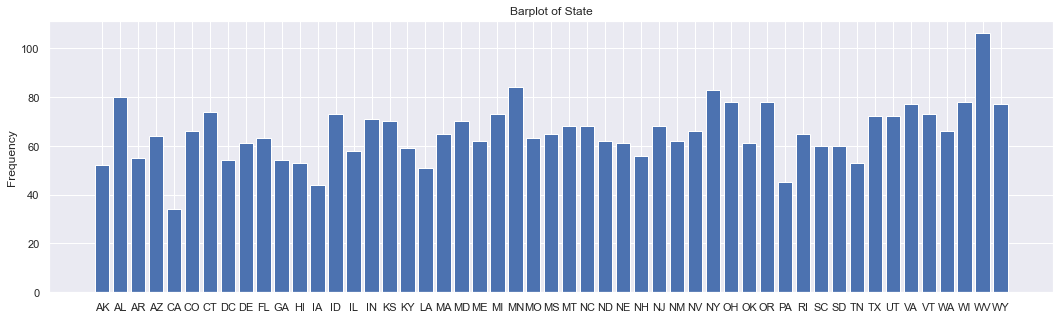

In [14]:
DrawBarplot(data, 'State')

In [16]:
def DrawBoxplot2(DataFrame, xAtt, yAtt, hAtt="N/A"):
  plt.figure()
  plt.subplots(figsize=(10,5))
  if(hAtt == "N/A"):
    sns.boxplot(x=xAtt, y=yAtt,  data=DataFrame)
  else:
    sns.boxplot(x=xAtt, y=yAtt,  hue=hAtt,  data=DataFrame)
  plt.show()

<Figure size 432x288 with 0 Axes>

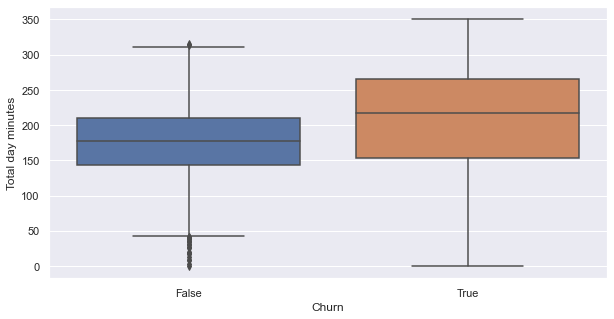

<Figure size 432x288 with 0 Axes>

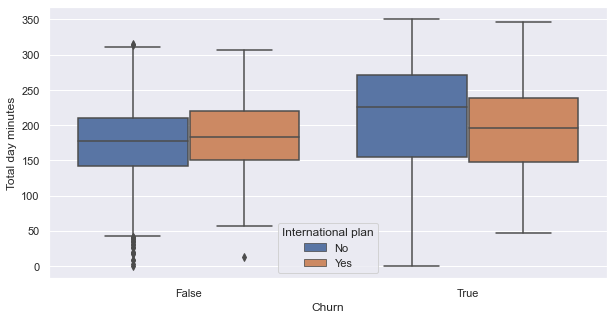

In [21]:
DrawBoxplot2(data, xAtt = 'Churn', yAtt='Total day minutes')
DrawBoxplot2(data, xAtt = 'Churn', yAtt='Total day minutes', hAtt = 'International plan')

In [22]:
def DrawCountplot(DataFrame, att, hatt="N/A"):
  if(hatt == "N/A"):
    sns.countplot(x=att, data=DataFrame)
  else:
    sns.countplot(x=att, hue=hatt, data=DataFrame)
  plt.show()
  
def DrawHistogram(DataFrame, att):
  plt.figure()
  DataFrame[att].hist(edgecolor='black', bins=20)
  plt.title(att)
  plt.show()

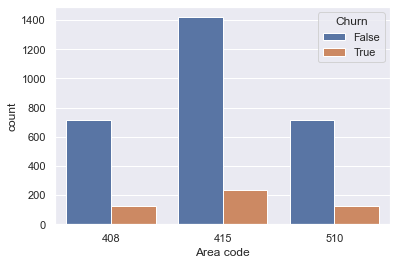

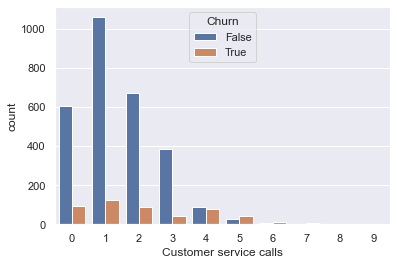

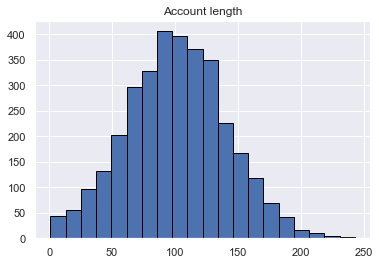

In [23]:
DrawCountplot(data, 'Area code', 'Churn')
DrawCountplot(data, 'Customer service calls', 'Churn')
DrawHistogram(data,'Account length')

In [24]:
from sklearn.preprocessing import LabelEncoder
data_encoder = data.copy()
data_encoder['State'] = LabelEncoder().fit_transform(data_encoder['State'])
data_encoder['International plan'] = LabelEncoder().fit_transform(data_encoder['International plan'])
data_encoder['Voice mail plan'] = LabelEncoder().fit_transform(data_encoder['Voice mail plan'])
data_encoder = data_encoder.join(pd.get_dummies(data_encoder['Area code'], prefix='Area_code_'))
data_encoder = data_encoder.drop('Area code', axis=1)
data_encoder.head(10)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area_code__408,Area_code__415,Area_code__510
0,16,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,0,1,0
5,1,118,1,0,0,223.4,98,37.98,220.6,101,...,118,9.18,6.3,6,1.70,0,False,0,0,1
6,19,121,0,1,24,218.2,88,37.09,348.5,108,...,118,9.57,7.5,7,2.03,3,False,0,0,1
7,24,147,1,0,0,157.0,79,26.69,103.1,94,...,96,9.53,7.1,6,1.92,0,False,0,1,0
8,18,117,0,0,0,184.5,97,31.37,351.6,80,...,90,9.71,8.7,4,2.35,1,False,1,0,0
9,49,141,1,1,37,258.6,84,43.96,222.0,111,...,97,14.69,11.2,5,3.02,0,False,0,1,0


In [25]:
ColumnList = data_encoder.columns
ColumnList = list(set(ColumnList) - set(['Churn'])) 
ColumnList.append('Churn') 
print(ColumnList)

['Total intl minutes', 'Area_code__408', 'Area_code__415', 'State', 'Voice mail plan', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Total eve charge', 'Total eve calls', 'International plan', 'Total day calls', 'Total day minutes', 'Total eve minutes', 'Total day charge', 'Total night charge', 'Number vmail messages', 'Area_code__510', 'Total night minutes', 'Total night calls', 'Account length', 'Churn']


In [26]:
data_encoder = data_encoder[ColumnList]
display(data_encoder.head(10))

,Total intl minutes,Area_code__408,Area_code__415,State,Voice mail plan,Total intl calls,Total intl charge,Customer service calls,Total eve charge,Total eve calls,...,Total day minutes,Total eve minutes,Total day charge,Total night charge,Number vmail messages,Area_code__510,Total night minutes,Total night calls,Account length,Churn
0,10.0,0,1,16,1,3,2.70,1,16.78,99,...,265.1,197.4,45.07,11.01,25,0,244.7,91,128,False
1,13.7,0,1,35,1,3,3.70,1,16.62,103,...,161.6,195.5,27.47,11.45,26,0,254.4,103,107,False
2,12.2,0,1,31,0,5,3.29,0,10.30,110,...,243.4,121.2,41.38,7.32,0,0,162.6,104,137,False
3,6.6,1,0,35,0,7,1.78,2,5.26,88,...,299.4,61.9,50.90,8.86,0,0,196.9,89,84,False
4,10.1,0,1,36,0,3,2.73,3,12.61,122,...,166.7,148.3,28.34,8.41,0,0,186.9,121,75,False
5,6.3,0,0,1,0,6,1.70,0,18.75,101,...,223.4,220.6,37.98,9.18,0,1,203.9,118,118,False
6,7.5,0,0,19,1,7,2.03,3,29.62,108,...,218.2,348.5,37.09,9.57,24,1,212.6,118,121,False
7,7.1,0,1,24,0,6,1.92,0,8.76,94,...,157.0,103.1,26.69,9.53,0,0,211.8,96,147,False
8,8.7,1,0,18,0,4,2.35,1,29.89,80,...,184.5,351.6,31.37,9.71,0,0,215.8,90,117,False
9,11.2,0,1,49,1,5,3.02,0,18.87,111,...,258.6,222.0,43.96,14.69,37,0,326.4,97,141,False


In [27]:
# Split Train and Test and check shape 
def SplitTrainAndTest(data, TrainRate, TargetAtt):
    # gets a random TrainDataRate % of the entire set
    training = data.sample(frac=TrainRate, random_state=1)
    # gets the left out portion of the dataset
    testing = data.loc[~data.index.isin(training.index)]

    data_train = training.drop(TargetAtt, 1)
    label_train = training[[TargetAtt]]
    data_test = testing.drop(TargetAtt, 1)
    label_test = testing[[TargetAtt]]

    PrintTrainTestInfo(data_train, label_train, data_test, label_test)
    return data_train, label_train, data_test, label_test
    
def PrintTrainTestInfo(data_train, label_train, data_test, label_test):
  print("Train shape : ", data_train.shape)
  print("Test shape : ", data_test.shape)

In [28]:
data_train, label_train, data_test, label_test = SplitTrainAndTest(data_encoder, TrainRate = 0.7, TargetAtt = 'Churn')

Train shape :  (2333, 21)
Test shape :  (1000, 21)


In [29]:
def NaiveBayesLearning(DataTrain, TargetTrain):
    from sklearn.naive_bayes import GaussianNB
    NBModel = GaussianNB()
    NBModel.fit(DataTrain, TargetTrain.values.ravel())

    return NBModel

def NaiveBayesTesting(NBModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTest = NBModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)

    return Accuracy, PredictTest

In [30]:
def LogisticRegressionLearning(DataTrain, TargetTrain):
    # Apply the Logistic Regression
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    logreg = LogisticRegression()
    # training by Logistic Regression
    logreg.fit(DataTrain, TargetTrain.values.ravel())

    return logreg

def LogisticRegressionTesting(LRModel,DataTest, TargetTest):
    # Testing and calculate the accuracy
    from sklearn.metrics import accuracy_score

    logreg = LRModel
    PredictTest = logreg.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Logistic regression accuracy: {:.3f}'.format(Accuracy))

    return Accuracy, PredictTest

In [31]:
def RandomForestLearning(DataTrain, TargetTrain):
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier(n_estimators = 500)
    rf.fit(DataTrain, TargetTrain.values.ravel())

    return rf

def RandomForestTesting(RFModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score

    PredictTest = RFModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))

    return Accuracy, PredictTest

In [32]:
def SVMLearning(DataTrain, TargetTrain, ClassifierType = " "):
    from sklearn.svm import SVC
    if(ClassifierType == 'Linear'):
        svc = SVC(kernel="linear", C=0.025)
#         print('SVM Linear processing')
    # Radial basis function kernel
    elif (ClassifierType == 'RBF'):
        svc = SVC(gamma=2, C=1)
#         print('SVM RBF processing')
    else:
        svc = SVC()
#         print('SVM Default processing')
    svc.fit(DataTrain, TargetTrain.values.ravel())
    return svc

def SVMTesting(SVMModel, DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTest = SVMModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Support Vector Machine Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))
    return Accuracy, PredictTest

In [33]:
X_train = data_train
y_train = label_train
X_test = data_test
y_test = label_test

In [34]:
NBModel = NaiveBayesLearning(X_train, y_train)
NBAccuracy,NBPredictTest = NaiveBayesTesting(NBModel,X_test, y_test)
print('Naive Bayes accuracy: {:.3f}'.format(NBAccuracy))

print(NBModel.predict_proba(X_test)[1,:])
print(NBPredictTest[1])
print(NBModel.predict_proba(X_test)[0,:])
print(NBPredictTest[0])

Naive Bayes accuracy: 0.868
[0.50111673 0.49888327]
False
[0.05378991 0.94621009]
True


In [35]:
LRModel = LogisticRegressionLearning(X_train, y_train)
LRAccuracy,LRPredictTest = LogisticRegressionTesting(LRModel,X_test, y_test)
print('Logistic Regression accuracy: {:.3f}'.format(LRAccuracy))

print(LRModel.predict_proba(X_test)[1,:])
print(LRPredictTest[1])
print(LRModel.predict_proba(X_test)[0,:])
print(LRPredictTest[0])

Logistic Regression accuracy: 0.846
[0.61862725 0.38137275]
False
[0.89164446 0.10835554]
False


In [36]:
RFModel = RandomForestLearning(X_train, y_train)
RFAccuracy,RFPredictTest = RandomForestTesting(RFModel,X_test, y_test)
print('Random Forest accuracy: {:.6f}'.format(RFAccuracy))

print(RFModel.predict_proba(X_test)[1,:])
print(RFPredictTest[1])
print(RFModel.predict_proba(X_test)[0,:])
print(RFPredictTest[0])

Random Forest accuracy: 0.950000
[0.518 0.482]
False
[0.904 0.096]
False


In [37]:
LiSVMModel = SVMLearning(X_train, y_train)
LiSVMAccuracy,LiSVMPredictTest = SVMTesting(LiSVMModel, X_test, y_test)
print('Linear SVM accuracy: {:.6f}'.format(LiSVMAccuracy))

RBFSVMModel = SVMLearning(X_train, y_train, 'RBF')
RBFSVMAccuracy,RBFSVMPredictTest = SVMTesting(RBFSVMModel, X_test, y_test)
print('RBF SVM accuracy: {:.6f}'.format(RBFSVMAccuracy))

Linear SVM accuracy: 0.847000
RBF SVM accuracy: 0.847000


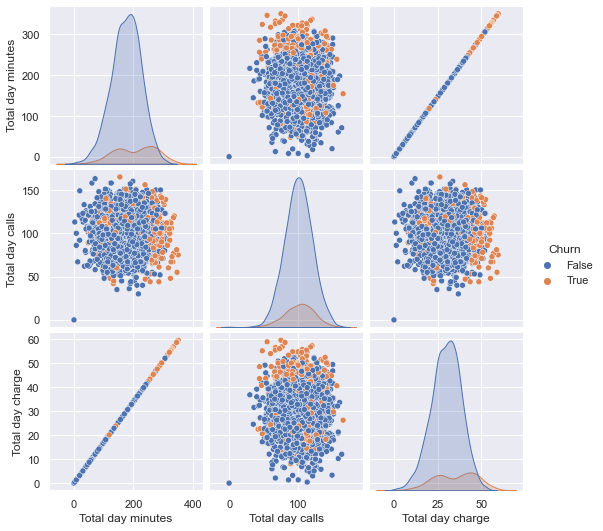

In [38]:
sns.pairplot(data, vars=["Total day minutes", "Total day calls", "Total day charge"], hue="Churn")

In [40]:
def DrawCorrelationMap(data, AttList):
  correlation_matrix = data.loc[:,AttList].corr().round(2)
  print("Correlation Matrix : ")
  print(correlation_matrix.to_string())
  # annot = True to print the values inside the square
  sns.heatmap(data=correlation_matrix, cmap = 'coolwarm', annot=True)
  
  return correlation_matrix

Correlation Matrix : 
                     Total day minutes  Total day calls  Total day charge  Total night minutes  Total night calls  Total night charge
Total day minutes                 1.00             0.01              1.00                 0.00               0.02                0.00
Total day calls                   0.01             1.00              0.01                 0.02              -0.02                0.02
Total day charge                  1.00             0.01              1.00                 0.00               0.02                0.00
Total night minutes               0.00             0.02              0.00                 1.00               0.01                1.00
Total night calls                 0.02            -0.02              0.02                 0.01               1.00                0.01
Total night charge                0.00             0.02              0.00                 1.00               0.01                1.00


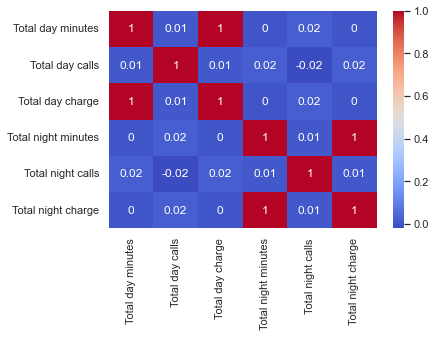

In [41]:
AttList = [ "Total day minutes", "Total day calls","Total day charge","Total night minutes","Total night calls","Total night charge"]
correlation_matrix = DrawCorrelationMap(data, AttList)

In [42]:
def BayesianMLApproach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt, TargetNames):

  # Instantiate the classifier
  from sklearn.naive_bayes import GaussianNB
  BayesModel = GaussianNB()
  
  # Train classifier
  BayesModel.fit( data_train[FeatureList].values, label_train)
  y_pred = BayesModel.predict(data_test[FeatureList])

  # Print results
  RowsNum = data_test.shape[0]
  mislabeledNum =  (label_test[TargetAtt] != y_pred).sum()
  correctlabeledNum = RowsNum - mislabeledNum
  print("Number of correct labeled points out of a total {} points : {}"
        .format(RowsNum, correctlabeledNum))
  print("Number of mislabeled points out of a total {} points : {}"
        .format(RowsNum,mislabeledNum))
  print('Accuracy of classifier on training set: {:.2f}'
     .format(BayesModel.score(data_train[FeatureList], label_train)))
  print('Accuracy of classifier on test set: {:.2f}'
     .format(BayesModel.score(data_test[FeatureList], label_test)))
  
  ColumnNames = ["Proba_" + s for s in TargetNames]
  PredictDF = pd.DataFrame(BayesModel.predict_proba(data_test[FeatureList]), columns = ColumnNames)
  PredictDF["LabelTest"] = list(label_test[TargetAtt])
  PredictDF["Predict"] = y_pred
  print(PredictDF.head().to_string())
  
  return BayesModel, PredictDF

def PredictByBayesian(BayesModel, FeatureSample, TrueLabel, TargetNames):
  if isinstance(FeatureSample, pd.Series):
    FeatureSample = [FeatureSample]
  
  print(FeatureSample)
  
  ColumnNames = ["Proba_" + s for s in TargetNames]
  DirectPredictDF = pd.DataFrame(BayesModel.predict_proba(FeatureSample), columns = ColumnNames)
  DirectPredictDF["LabelTest"] = list(TrueLabel)
  DirectPredictDF["Predict"] = BayesModel.predict(FeatureSample)
  print(DirectPredictDF.head().to_string())
  
  return DirectPredictDF

In [43]:
FeatureList =["Account length", "Total day minutes", "Total day calls", "Customer service calls"]
TargetAtt = "Churn"
TargetNames = ["False", "True"]
BayesModel, PredictDF = BayesianMLApproach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt,TargetNames)

Number of correct labeled points out of a total 1000 points : 863
Number of mislabeled points out of a total 1000 points : 137
Accuracy of classifier on training set: 0.87
Accuracy of classifier on test set: 0.86
   Proba_False  Proba_True  LabelTest  Predict
0     0.889552    0.110448      False    False
1     0.699394    0.300606      False    False
2     0.066446    0.933554       True     True
3     0.933008    0.066992      False    False
4     0.934733    0.065267      False    False


In [44]:
FeatureSample = data.loc[[0,3,5,6], FeatureList]
TargetNames = ["False", "True"]
TrueLabel = data.loc[[0,3,5,6], "Churn"]
DirectPredictDF = PredictByBayesian(BayesModel, FeatureSample ,TrueLabel , TargetNames)

   Account length  Total day minutes  Total day calls  Customer service calls
0             128              265.1              110                       1
3              84              299.4               71                       2
5             118              223.4               98                       0
6             121              218.2               88                       3
   Proba_False  Proba_True  LabelTest  Predict
0     0.815023    0.184977      False    False
1     0.574437    0.425563      False    False
2     0.889552    0.110448      False    False
3     0.816956    0.183044      False    False
